<a href="https://colab.research.google.com/github/samwang181823/Introduction-to-Computers/blob/main/0517.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

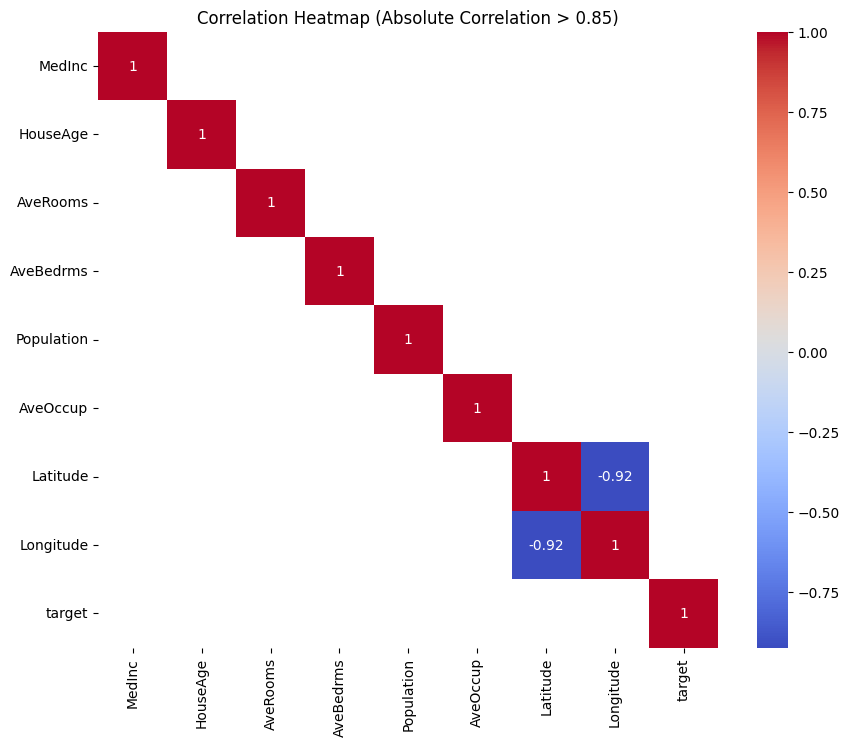

In [7]:
california = fetch_california_housing()
data = pd.DataFrame(data= np.c_[california['data'], california['target']],
                     columns= california['feature_names'] + ['target'])

# 熱度圖
corr_matrix = data.corr()
high_corr = corr_matrix[abs(corr_matrix) > 0.85]
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Absolute Correlation > 0.85)')
plt.show()

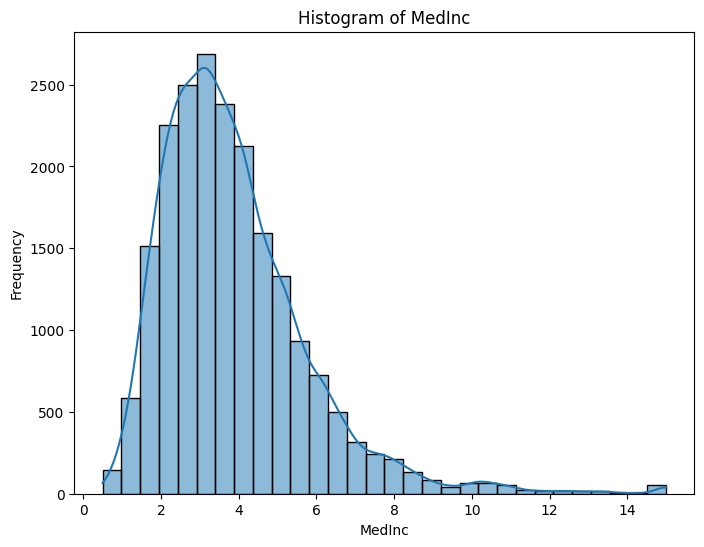

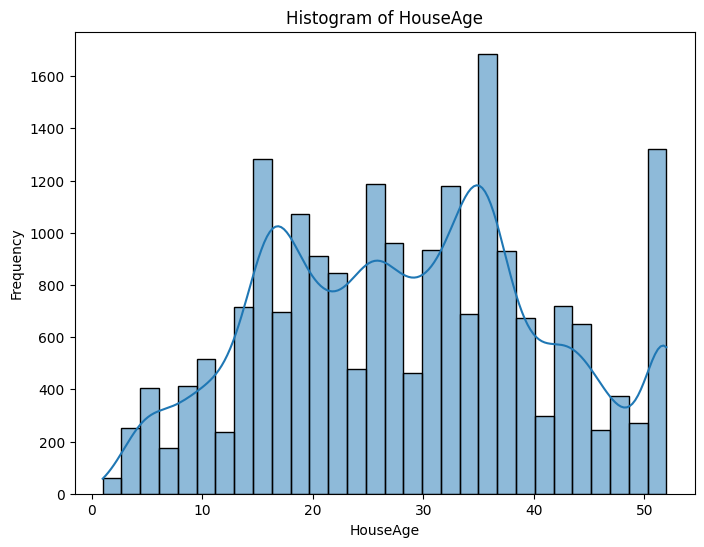

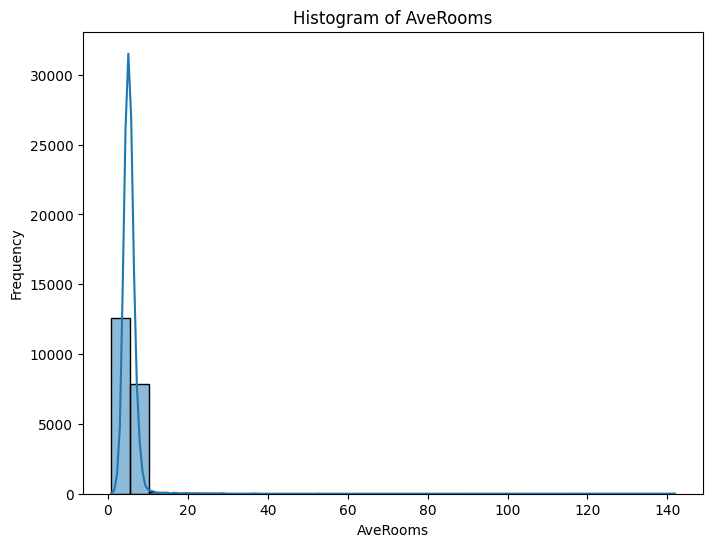

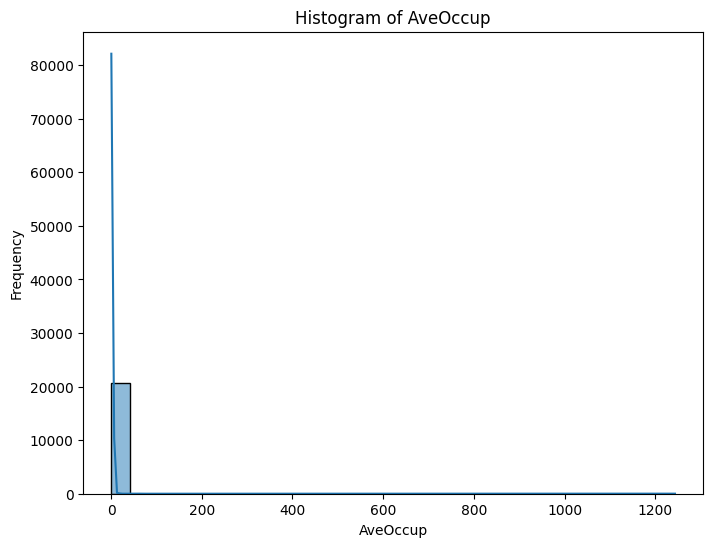

In [8]:
selected_variables = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']
for var in selected_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[var], bins=30, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

In [9]:
selected_features = ['MedInc', 'HouseAge', 'AveRooms']
X = data[selected_features]
y = data['target']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
coefficients = pd.DataFrame({'Variable': selected_features, 'Coefficient': model.coef_})
print("Regression Coefficients (MinMaxScaler):")
print(coefficients)

Regression Coefficients (MinMaxScaler):
   Variable  Coefficient
0    MedInc     6.449077
1  HouseAge     0.858648
2  AveRooms    -3.970876


In [10]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nTest set evaluation (MinMaxScaler):")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")


Test set evaluation (MinMaxScaler):
MSE: 0.6589108649336336
MAE: 0.6033213567335043
R^2 Score: 0.49717158850807075


In [11]:
X_log = np.log1p(X)
X_combined = np.concatenate((X_scaled, X_log), axis=1)
X_train_combined, X_test_combined, _, _ = train_test_split(X_combined, y, test_size=0.2, random_state=42)
model_combined = LinearRegression()
model_combined.fit(X_train_combined, y_train)
coefficients_combined = pd.DataFrame({'Variable': selected_features + [f'{feat}_log' for feat in selected_features],
                                      'Coefficient': model_combined.coef_})
print("\nRegression Coefficients (MinMaxScaler + Log Transform):")
print(coefficients_combined)


Regression Coefficients (MinMaxScaler + Log Transform):
       Variable  Coefficient
0        MedInc     5.073185
1      HouseAge     1.081515
2      AveRooms    13.297116
3    MedInc_log     0.870491
4  HouseAge_log    -0.148551
5  AveRooms_log    -1.756954


In [12]:
y_pred_combined = model_combined.predict(X_test_combined)
mse_combined = mean_squared_error(y_test, y_pred_combined)
mae_combined = mean_absolute_error(y_test, y_pred_combined)
r2_combined = r2_score(y_test, y_pred_combined)
print("\nTest set evaluation (MinMaxScaler + Log Transform):")
print(f"MSE: {mse_combined}")
print(f"MAE: {mae_combined}")
print(f"R^2 Score: {r2_combined}")


Test set evaluation (MinMaxScaler + Log Transform):
MSE: 0.6378434756888074
MAE: 0.5877570908498281
R^2 Score: 0.51324854585089


In [13]:
print("\nComparison:")
print("Without log transform:")
print(f"MSE: {mse}, MAE: {mae}, R^2: {r2}")
print("With log transform:")
print(f"MSE: {mse_combined}, MAE: {mae_combined}, R^2: {r2_combined}")


Comparison:
Without log transform:
MSE: 0.6589108649336336, MAE: 0.6033213567335043, R^2: 0.49717158850807075
With log transform:
MSE: 0.6378434756888074, MAE: 0.5877570908498281, R^2: 0.51324854585089
